# Generate Jobs Report Data for Chartbook

Brian Dew

@bd_econ

In [1]:
import sys
sys.path.append('../src')

import uschartbook.config

from uschartbook.config import *
from uschartbook.utils import *

### API Request

In [2]:
# Series stored as a dictionary
series = {'LNS14000003': 'White', 
          'LNS14000006': 'Black',
          'LNS14000009': 'Hispanic',
          'LNS14032183': 'Asian',
          'LNS14000000': 'Total',
          'LNS13327709': 'U6',
          'LNS13000000': 'Level',
          'LNU03008636': 'LT',
          'LNU03008516': 'MT',
          'LNU00000000': 'POP',
          'LNS12300060': 'PA_EPOP',
          'LNS13023621': 'Job Loser',
          'LNS13023653': 'Temporary Layoff',
          'LNS13026638': 'Permanent Separation',
          'LNS13023705': 'Job Leaver', 
          'LNS13023557': 'Re-entrant',
          'LNS13023569': 'New entrant',
          'LNS13008276': 'Median',
          'LNS13008275': 'Mean',
          'LNS17200000': 'NILF',
          'LNS17100000': 'UNEMP',
          'LNS11000000': 'LF',
          'LNS12032194': 'PTECON',
          'LNS12005977': 'PTNONECON'}

# Start year and end year
dates = (1988, 2022)
df = bls_api(series, dates, bls_key)
df.to_csv(data_dir / 'jobs_report_main.csv', index_label='date')
print(dtxt(df.index[-1])['mon1'])

Post Request Status: REQUEST_SUCCEEDED
October 2022


In [3]:
# Series stored as a dictionary
series = {'CES0500000003': 'ALL', 
          'CES0500000008': 'PNS',
          'LNS12005054': 'avghrstot',
          'LNU02033699': 'avghrsserv',
          'CES0500000002': 'ceshrstot',
          'CES0600000002': 'ceshrsgoods',
          'CES0800000002': 'ceshrsserv',
          'CES0500000007': 'ceshrspns',
          'CES9000000001': 'govjobs',
          'CES9091000001': 'fedjobs',
          'CES9092000001': 'stjobs',
          'CES9093000001': 'locjobs',
          'LNU02033232': 'avghrsptecon',
          'LNU01000000': 'LFnsa',
          'LNS12026619': 'MJHsa',
          'LNU02000000': 'EMP',
          'LNS12000000': 'EMPsa',
          'LNU00000001': 'MenPop',
          'LNU00000002': 'WomenPop',
          'LNU01000001': 'MenLF',
          'LNU01000002': 'WomenLF',
          'LNS11300001': 'MenLFPR',
          'LNS11300002': 'WomenLFPR',
          'LNU02048984': 'seinc',
          'LNS12027714': 'seuninc'}

# Start year and end year
dates = (1988, 2022)
df = bls_api(series, dates, bls_key)
df.to_csv(data_dir / 'jobs_report_main2.csv', index_label='date')

Post Request Status: REQUEST_SUCCEEDED


In [4]:
# Series stored as a dictionary
series = {'LNS17100001': 'MenUE',
          'LNS17100002': 'WomenUE',
          'LNS17200001': 'MenNE',
          'LNS17200002': 'WomenNE',
          'LNS17400001': 'MenEU',
          'LNS17400002': 'WomenEU',
          'LNS17600001': 'MenNU',
          'LNS17600002': 'WomenNU',
          'LNS17800001': 'MenEN',
          'LNS17800002': 'WomenEN',
          'LNS17900001': 'MenUN',
          'LNS17900002': 'WomenUN',
          'LNS12000001': 'MenE',
          'LNS12000002': 'WomenE',
          'LNS13000001': 'MenU',
          'LNS13000002': 'WomenU',
          'LNS15000001': 'MenN',
          'LNS15000002': 'WomenN'}

# Start year and end year
dates = (2018, 2022)
df = bls_api(series, dates, bls_key)
df.to_csv(data_dir / 'jobs_report_main3.csv', index_label='date')

Post Request Status: REQUEST_SUCCEEDED


### Labor Force Gross Flows

In [5]:
df = (pd.read_csv(data_dir / 'jobs_report_main3.csv', parse_dates=['date'])
        .set_index('date')) / 1000

cols = ['MenEU', 'WomenEU', 'MenEN', 'WomenEN', 'MenUE', 'WomenUE',
        'MenUN', 'WomenUN', 'MenNE', 'WomenNE', 'MenNU', 'WomenNU']

cols2 = []
for col in cols:
    name = f'{col}{col[-2]}'
    cols2.append(name)
    df[name] = (df[col] / df[f'{col[:-2]}{col[-2]}'].shift()) * 100

df.loc['2013-01-01':, cols2].to_csv(data_dir / 'grosslf.csv', index_label='date')

### Unemployment rate

In [6]:
df = pd.read_csv(data_dir / 'jobs_report_main.csv', index_col='date', 
                 parse_dates=True)
srs = ['Total', 'U6']
df.loc['1989':, srs].to_csv(data_dir / 'unemp2.csv', index_label='date')

srs = ['White', 'Black', 'Hispanic']
df.loc['1989':, srs].to_csv(data_dir / 'unemp.csv', index_label='date')

s = series_info(df['Level'])
s2 = series_info(df['Total'])
s3 = series_info(df['Black'])
s4 = series_info(df['U6'])
compare = compare_text(df['Total'].iloc[-1], df['Total'].iloc[-2], [0.15, 1.5, 3.0])
compare2 = compare_text(df['Total'].iloc[-1], df['Total'].iloc[-13], [0.15, 1.5, 3.0])
pryrdt = dtxt(df.index[-13])['mon1']

if compare[-5:] != compare2[-5:]:
    conj = f', but {compare2} the {pryrdt} rate of {df["Total"].iloc[-13]:.1f} percent'
elif compare != compare2:
    conj = f', and {compare2} the {pryrdt} rate of {df["Total"].iloc[-13]:.1f} percent'
else:
    conj = ''
    
text = ('BLS \href{https://www.bls.gov/news.release/empsit.nr0.htm}{reports} '+
        f'{s["val_latest"]/1000:.1f} million '+
        f'unemployed people in {s["date_latest_ft"]}, '+
        f'and an unemployment rate of {s2["val_latest"]} percent '+
        '(see {\color{blue!50!cyan}\\textbf{---}}), '+
        f'{compare} the {s["date_prev_ft"]} rate of {s2["val_prev"]} percent'+
        f'{conj}.')
write_txt(text_dir / 'unemp1.txt', text)
print(text, '\n')

mval = f', {s4["last_matched"]}.' if s4['days_since_match'] > 1000 else '.'
text = (f'In {s["date_latest_ft"]}, the labor under-utilization rate is '+
        f'{s4["val_latest"]} percent '+
        '(see {\color{blue}\\textbf{---}})'+
        f'{mval}')
write_txt(text_dir / 'unemp2.txt', text)
print(text, '\n')

write_txt(text_dir / 'u6_node.txt', 
          end_node(df['U6'], 'blue', date='m', percent=True, offset=0.4))
write_txt(text_dir / 'u3_node.txt', end_node(df['Total'], 'blue!50!cyan', percent=True))

black_ch = df['Black'].iloc[-1] - df.loc['2020-02-01', 'Black']
bch = value_text(black_ch, style='increase_by', ptype='pp')
text = ('Periods of unemployment are more common for disadvantaged groups. '+
        'The black or African American unemployment rate is typically '+
        'double the white unemployment rate. Employment opportunities for '+
        'disadvantaged groups are more-dependent on current labor market '+
        'conditions. A very tight labor market reduces racial '+
        'discrimination in hiring, while disadvantaged groups are more '+
        'likely to lose jobs in a downturn. '+
        'Since February 2020, the black unemployment rate '+
        f'has {bch} to {s3["val_latest"]:.1f} percent '+
        '(see {\color{green!50!teal!60!black}\\textbf{---}}).')
write_txt(text_dir / 'unemp3.txt', text)
print(text)

BLS \href{https://www.bls.gov/news.release/empsit.nr0.htm}{reports} 6.1 million unemployed people in October 2022, and an unemployment rate of 3.7 percent (see {\color{blue!50!cyan}\textbf{---}}), slightly above the September 2022 rate of 3.5 percent, but slightly below the October 2021 rate of 4.6 percent. 

In October 2022, the labor under-utilization rate is 6.8 percent (see {\color{blue}\textbf{---}}). 

Periods of unemployment are more common for disadvantaged groups. The black or African American unemployment rate is typically double the white unemployment rate. Employment opportunities for disadvantaged groups are more-dependent on current labor market conditions. A very tight labor market reduces racial discrimination in hiring, while disadvantaged groups are more likely to lose jobs in a downturn. Since February 2020, the black unemployment rate has decreased by 0.1 percentage point to 5.9 percent (see {\color{green!50!teal!60!black}\textbf{---}}).


In [7]:
srs = ['U6', 'Total', 'White', 'Black', 'Hispanic', 'Asian']
untab = df[srs].iloc[-6:].iloc[::-1].T
untab.columns = untab.columns.strftime('%b `%y')
untab['GFC peak'] = df.loc['2005':'2013', srs].max()
untab['Date'] = df.loc['2005':'2013', srs].idxmax().dt.strftime('%b `%y')
d = {'Total': 'Unemployment Rate (U3)',
     'U6': 'Under-utilization Rate (U6)',
     'White': '\hspace{2mm} White',
     'Black': '\hspace{2mm} Black',
     'Hispanic': '\hspace{2mm} Hispanic',
     'Asian': '\hspace{2mm} Asian'}
untab.index = untab.index.map(d)

untab.loc['\\textit{by race/ethnicity:}', untab.columns] = [''] * 8
untab = pd.concat([untab.iloc[0:2], untab.iloc[-1].to_frame().T, untab.iloc[2:6]])
untab.columns.name = None
untab.to_csv(data_dir / 'unemp1.tex', sep='&', lineterminator='\\\ ', quotechar=' ')

untab

/tmp/ipykernel_8794/1004144770.py:17: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  untab.to_csv(data_dir / 'unemp1.tex', sep='&', line_terminator='\\\ ', quotechar=' ')


,Oct `22,Sep `22,Aug `22,Jul `22,Jun `22,May `22,GFC peak,Date
Under-utilization Rate (U6),6.8,6.7,7.0,6.7,6.7,7.1,17.2,Dec `09
Unemployment Rate (U3),3.7,3.5,3.7,3.5,3.6,3.6,10.0,Oct `09
\textit{by race/ethnicity:},,,,,,,,
\hspace{2mm} White,3.2,3.1,3.2,3.1,3.3,3.2,9.2,Oct `09
\hspace{2mm} Black,5.9,5.8,6.4,6.0,5.8,6.2,16.8,Mar `10
\hspace{2mm} Hispanic,4.2,3.8,4.5,3.9,4.3,4.3,13.0,Aug `09
\hspace{2mm} Asian,2.9,2.5,2.8,2.6,3.0,2.4,8.4,Dec `09


### Labor Force Participation Rate

In [8]:
df = (pd.read_csv(data_dir / 'jobs_report_main2.csv', parse_dates=['date'])
        .set_index('date'))[['MenLFPR', 'WomenLFPR']]
df['TotLFPR'] = (pd.read_csv(data_dir / 'jobs_report_main.csv', 
                             parse_dates=['date'])
                   .assign(TotLFPR = lambda x: (x.LF / x.POP)*100)
                   .set_index('date'))['TotLFPR']
df.loc['1989':].to_csv(data_dir / 'lfpr.csv', index_label='date')

col = {'MenLFPR': 'blue!90!cyan',
       'WomenLFPR': 'orange!90!red',
       'TotLFPR': 'green!70!blue'}
nodes = (end_node(df['MenLFPR'], col['MenLFPR'], 
                  percent=True, date='m', full_year=True, 
                  offset=0.35) + '\n' + 
         '\n'.join(end_node(df[name], color, percent=True) 
                   for name, color in col.items() if name != 'MenLFPR'))
write_txt(text_dir / 'lfpr_nodes.txt', nodes)

tot = df['TotLFPR']
ltdt = dtxt(df.index[-1])['mon1']
write_txt(text_dir / 'lfpr_blsdate.txt', ltdt)
prdt, prdt2 = (dtxt(df.index[i])['mon3'] 
               if df.index[-1].year == df.index[i].year 
               else dtxt(df.index[i])['mon1'] 
               for i in [-2, -3])
cpdt = '2020-02-01'
compdt = dtxt(cpdt)['mon1']
feb20val = tot.loc[cpdt]
mltval = df['MenLFPR'].iloc[-1]
wltval = df['WomenLFPR'].iloc[-1]
mchval = mltval - df['MenLFPR'].loc['2020-01-01']
wchval = wltval - df['WomenLFPR'].loc['2020-01-01']
mch = value_text(mchval, style='increase', ptype='pp')
wch = value_text(wchval, style='increase', ptype='pp')
cl = {k: c_line(v) for k, v in col.items()}
text = (f'In the latest data, covering {ltdt}, {tot.iloc[-1]:.1f} '+
        'percent of people age 16 and older are in the labor force '+
        f'{cl["TotLFPR"]}, compared to {tot.iloc[-2]:.1f} percent in '+
        f'{prdt} and {tot.iloc[-3]:.1f} percent in {prdt2}. In '+
        f'{compdt}, when US confirmed cases of COVID-19 were still '+
        f'low, the labor force participation rate was {feb20val:.1f} '+
        f'percent.\n\nIn {ltdt}, {mltval:.1f} percent of men age '+
        f'16 and older are in the labor force {cl["MenLFPR"]}, compared to '+
        f'{wltval:.1f} percent of women {cl["WomenLFPR"]}. Since '+
        f'{compdt}, labor force participation has {mch} among men, '+
        f'and {wch} among women.')
write_txt(text_dir / 'lfpr_text.txt', text)
print(text)

In the latest data, covering October 2022, 62.2 percent of people age 16 and older are in the labor force (see {\color{green!70!blue}\textbf{---}}), compared to 62.3 percent in September and 62.4 percent in August. In February 2020, when US confirmed cases of COVID-19 were still low, the labor force participation rate was 63.4 percent.

In October 2022, 68.1 percent of men age 16 and older are in the labor force (see {\color{blue!90!cyan}\textbf{---}}), compared to 56.7 percent of women (see {\color{orange!90!red}\textbf{---}}). Since February 2020, labor force participation has decreased 1.2 percentage points among men, and decreased 1.1 percentage points among women.


### Employment rate

In [9]:
df = (pd.read_csv(data_dir / 'jobs_report_main.csv', 
                  index_col='date', parse_dates=True)
        .loc['1989':, 'PA_EPOP'])
df.to_csv(data_dir / 'epop.csv', index_label='date')

color = 'blue!90!cyan'
node = end_node(df, color, date='m', percent=True, full_year=True)
write_txt(text_dir / 'epop_node.txt', node)

ltdate = dtxt(df.index[-1])['mon1']
ltval = df.iloc[-1]
prval = df.iloc[-2]
prdate = dtxt(df.index[-2])['mon1']
prtxt = f'compared to {prval} percent in {prdate}'
compval = df.loc['2019-06-01': '2020-03-01'].max()
last = series_info(df)['last_matched']
text2 = prtxt if ltval < compval else last
chtxt = value_text(df.diff(12).iloc[-1], ptype='pp', threshold=0.1)

pop = (cps_1mo(cps_dir, cps_date(), ['BASICWGT', 'AGE'])
       .query('25 <= AGE <=54').BASICWGT.sum()) / 1_000
rt99 = df.loc['1999': '2000'].mean()
ch99 = rt99 - ltval
ch99w = (ch99 / 100) * pop
ch99t = (f'{round(ch99w / 1000, 1)} million' 
         if ch99w > 999 else f'{round(ch99w, -1)} thousand')
text = (f'In {ltdate}, {ltval} percent of 25 to 54 years olds were '+
        f'employed, {text2}. Over the past year, the age 25 to 54 '+
        f'employment rate {chtxt}. The {ltdate} rate was {ch99:.1f} '+
        f'percentage points (equivalent to {ch99t} workers) below '+
        f'the average rate of {rt99:.1f} during the tight labor '+
        'market of 1999--2000.')
write_txt(text_dir / 'epop_text.txt', text)
print(text)

In October 2022, 79.8 percent of 25 to 54 years olds were employed, compared to 80.2 percent in September 2022. Over the past year, the age 25 to 54 employment rate increased 1.5 percentage points. The October 2022 rate was 1.6 percentage points (equivalent to 2.1 million workers) below the average rate of 81.4 during the tight labor market of 1999--2000.


In [10]:
#.loc[:d1.loc[d1.index.month == 12].index[-1]]

### Unemployment by reason

In [10]:
srs = ['Job Loser', 'Job Leaver', 'Re-entrant', 'New entrant', 
       'Temporary Layoff', 'Permanent Separation', 'Level']
d1 = (pd.read_csv(data_dir / 'jobs_report_main.csv', 
                  parse_dates=['date'])
        .set_index('date')).loc['1989':]

df = d1[srs].div(d1['LF'], axis='index') * 100
dfa = df.resample('AS').mean()
dfa.index = dfa.index + pd.DateOffset(months=6)
dfa.to_csv(data_dir / 'unemp_reason.csv', index_label='date', 
          float_format='%g')

lt = df.iloc[-3:]
lt.index = [dtxt(i)['mon7'] for i in lt.index]
lt = pd.concat([df.rolling(12).mean().iloc[-1].rename('12m avg'), lt.T], axis=1).T
lt.to_csv(data_dir / 'unemp_reason_mon.csv', index_label='date', 
          float_format='%g')

x_val = dtxt(dfa.index[-1])['datetime']
x_valpr = dtxt(dfa.index[-2])['datetime']
y_val = dfa.Level.iloc[-1]
yrp = f'{dtxt(dfa.index[-1])["year"][2:]}(p)'
barh = ('\\addplot[ybar, bar width=5.4pt, draw=black, fill=white!0] '+
        f'plot coordinates{{({x_val},{y_val})}};\n'+
        f'\\absnode{{{x_valpr}}}{{-0.25}}{{\scriptsize \color{{black!70}} {yrp}}};')
write_txt(text_dir / 'unemp_rsn_ltbar.txt', barh)

cols = ['Job Loser', 'New entrant', 'Re-entrant', 'Job Leaver']
sdf = lt[cols].iloc[-1]
height = ((sdf.cumsum() - (sdf / 2) + 0.25)).to_dict()
val = sdf.to_dict()
nodes = [f'\\absnode{{3.3}}{{{height[i]}}}{{\scriptsize {val[i]:.1f}}}' for i in cols]
nodetext = '\n'.join(nodes)
write_txt(text_dir / 'unemp_rsn_ltval.txt', nodetext)

colors = {'Job Loser': 'red!75!orange!70!white', 'New entrant': 'purple!80!red!85!black', 
          'Re-entrant': 'blue!70!teal!70!gray!62!white', 'Job Leaver': 'blue!72!black'}
cl = {k: c_box(v) for k, v in colors.items()}

ltdt = dtxt(df.index[-1])['mon1']
lt = df.iloc[-1]
jlsh = lt['Job Loser']
jl = (d1['Job Loser'].iloc[-1] / 1_000)
jle = lt['Job Leaver']
re = lt['Re-entrant']
ne = lt['New entrant']
text = ('There are several \\textbf{reasons for unemployment}. In '+
        f'{ltdt}, {jl:.1f} million people, or {jlsh:.1f} percent of '+
        'the labor force, were unemployed from losing their job '+
        f'{cl["Job Loser"]}. An additional {jle:.1f} percent '+
        f'voluntarily left a job {cl["Job Leaver"]}. Re-entrants, '+
        'people who left the labor force but are looking for a new '+
        f'job, comprised {re:.1f} percent {cl["Re-entrant"]}. Lastly, '+
        f'{ne:.1f} percent of the labor force were new entrants to '+
        f'the labor market, looking for their first job '+
        f'{cl["New entrant"]}.')
write_txt(text_dir / 'unemp_rsn.txt', text)
print(text)

lf = ['Employed', 'Unemployed']
naw_rate = lambda x: np.average(x['NOTATWORK'], weights=x['BASICWGT'])

columns = ['LFS', 'MONTH', 'YEAR', 'BASICWGT', 'NOTATWORK']

naw = (pd.concat([(pd.read_feather(cps_dir / f'cps{year}.ft', columns=columns)
              .query('LFS in @lf'))
           for year in range(2009, 2023)])
        .groupby(['YEAR', 'MONTH'])
        .apply(naw_rate) * 100)
naw.index = [pd.to_datetime(f'{ti[0]}-{ti[1]}-01') for ti in naw.index]
df['Employed, Not at Work'] = naw

tbl = df.iloc[-3:].T.iloc[:, ::-1]
tbl.columns = [dtxt(i)['mon2'] for i in tbl.columns]
tbl['12m Avg.'] = df.rolling(12).mean().iloc[-1]
tbl['Apr 2020'] = df.loc['2020-04-01']
tbl['2020'] = df.loc['2020'].mean()
tbl['2019'] = df.loc['2019'].mean()
tbl['2009 --`11'] = df.loc['2009': '2011'].mean()
tbl = tbl.round(1)
d = {'Level': '\ Unemployed, Any Reason',
     'Job Loser': f'\hspace{{2mm}}\cbox{{{colors["Job Loser"]}}} Job Loser',
     'Temporary Layoff': '\hspace{9mm}Temporary Layoff',
     'Permanent Separation': '\hspace{9mm}Permanent Separation',
     'Re-entrant': f'\hspace{{2mm}}\cbox{{{colors["Re-entrant"]}}} Re-entrant',
     'New entrant': f'\hspace{{2mm}}\cbox{{{colors["New entrant"]}}} New entrant',
     'Job Leaver': f'\hspace{{2mm}}\cbox{{{colors["Job Leaver"]}}} Job Leaver'}

final = tbl.loc[d.keys()].rename(d)

final.loc['\\textit{See also:}', final.columns] = [''] * 8
final.loc['\ \ Employed, Not at Work*'] = tbl.loc['Employed, Not at Work']
final.to_csv(data_dir / 'unempreason_table.tex', sep='&', 
             lineterminator='\\\ ', quotechar=' ')

tl = lt['Temporary Layoff']
pjl = lt['Permanent Separation']

text = (f'In {ltdt}, temporary layoffs were {tl:.1f} percent of '+
        f'the labor force. Permanent job losses were {pjl:.1f} '+
        'percent of labor force. ')
write_txt(text_dir / 'unemp_rsn2.txt', text)
print('\n', text)

There are several \textbf{reasons for unemployment}. In October 2022, 2.7 million people, or 1.6 percent of the labor force, were unemployed from losing their job (see \cbox{red!75!orange!70!white}). An additional 0.5 percent voluntarily left a job (see \cbox{blue!72!black}). Re-entrants, people who left the labor force but are looking for a new job, comprised 1.1 percent (see \cbox{blue!70!teal!70!gray!62!white}). Lastly, 0.3 percent of the labor force were new entrants to the labor market, looking for their first job (see \cbox{purple!80!red!85!black}).

 In October 2022, temporary layoffs were 0.5 percent of the labor force. Permanent job losses were 0.8 percent of labor force. 


### Unemployed long-term

In [11]:
srs = ['LT', 'MT', 'POP']
df = (pd.read_csv(data_dir / 'jobs_report_main.csv', parse_dates=['date'])
        .set_index('date')).loc['1989':, srs]

data = (df.divide(df['POP'], axis=0) * 100).drop(['POP'], axis=1)
data.to_csv(data_dir / 'ltu.csv', index_label='date', float_format='%g')

node = end_node(data['LT'], 'blue', percent=True, 
                date='m', full_year=True, offset=0.35)
write_txt(text_dir / 'ltu_node.txt', node)

node = end_node(data['MT'], 'violet!90!black', percent=True, 
                date='m', full_year=True, offset=0.35)
write_txt(text_dir / 'ltu_node2.txt', node)

ldate = dtxt(data.index[-1])['mon1']
pdate = dtxt(data.index[-13])['mon1']
hdate = dtxt(data['LT'].idxmax())['mon1']
prdt = dtxt(data.index[-2])['mon1']
prdt2 = dtxt(data.index[-3])['mon1']

recent_min = data.loc['2015':'2020-02-01', 'LT'].min()
recent_min_dt = dtxt(data.loc['2015':'2020-02-01', 'LT'].idxmin())['mon1']

text = (f'As of {ldate}, BLS '+
        '\href{https://www.bls.gov/webapps/legacy/cpsatab12.htm}{reports} '+
        f'that {data["LT"].iloc[-1]:.2f} percent of the age 16 and older '+
         'population have been unemployed for 27 weeks or longer, '+
        f'compared to {data["LT"].iloc[-13]:.2f} percent in {pdate} '+
        '(see {\color{blue}\\textbf{---}}). This measure of \\textbf{long-term '+
        f'unemployment}} peaked at {data["LT"].max():.2f} percent of the '+
        f'population in {hdate}, but had fallen to {recent_min:.2f} percent '+
        f'in {recent_min_dt}. \n \nIn {ldate}, {data["MT"].iloc[-1]:.2f} '+
        'percent of those age 16 and older have been unemployed for at '+
        'least 15 weeks (see {\color{violet!90!black}\\textbf{---}}), following '+
        f'{data["MT"].iloc[-2]:.2f} percent in {prdt}, '+
        f'and {data["MT"].iloc[-3]:.2f} percent in {prdt2}.')
write_txt(text_dir / 'ltu.txt', text)
print(text)

As of October 2022, BLS \href{https://www.bls.gov/webapps/legacy/cpsatab12.htm}{reports} that 0.44 percent of the age 16 and older population have been unemployed for 27 weeks or longer, compared to 0.89 percent in October 2021 (see {\color{blue}\textbf{---}}). This measure of \textbf{long-term unemployment} peaked at 2.96 percent of the population in April 2010, but had fallen to 0.42 percent in December 2019. 
 
In October 2022, 0.71 percent of those age 16 and older have been unemployed for at least 15 weeks (see {\color{violet!90!black}\textbf{---}}), following 0.70 percent in September 2022, and 0.73 percent in August 2022.


### Duration of Unemployment

In [12]:
s = {'Median': 'green!75!blue', 'Mean': 'blue!60!cyan'}
df = (pd.read_csv(data_dir / 'jobs_report_main.csv', 
                  parse_dates=['date'])
        .set_index('date')).loc['1989':, s.keys()]
df.to_csv(data_dir / 'unempdur.csv', index_label='date', 
          float_format='%g')
ltdt = dtxt(df.index[-1])['mon1']
lt = df.iloc[-1]

adj = node_adj(df)
smax = df.iloc[-1].idxmax()
adj[smax] = adj[smax] + 0.35

date = {series: 'm' if series == smax else None 
        for series in s.keys()}
nodes  ='\n'.join([end_node(df[series], color, 
                            date=date[series], full_year=True, 
                            size=1.1, offset=adj[series]) 
                   for series, color in s.items()])
write_txt(text_dir / 'unempdur_nodes.txt', nodes) 

pc_yr = df.loc['2019-03-01':'2020-02-01'].mean()
text = (f'Among those who are unemployed in {ltdt}, the average '+
        f'(mean) \\textbf{{duration of unemployment}} is {lt.Mean:.1f} '+
        f'weeks {c_line(s["Mean"])}, and the typical (median) '+
        f'duration of unemployment is {lt.Median:.1f} weeks '+
        f'{c_line(s["Median"])}. Over the year '+
        'prior to COVID-19, ending February 2020, the '+
        'average duration of unemployment was '+
        f'{pc_yr.Mean:.1f} weeks and the typical '+
        f'duration was {pc_yr.Median:.1f} weeks.')
write_txt(text_dir / 'unempdur.txt', text)
print(text)

Among those who are unemployed in October 2022, the average (mean) \textbf{duration of unemployment} is 20.8 weeks (see {\color{blue!60!cyan}\textbf{---}}), and the typical (median) duration of unemployment is 8.1 weeks (see {\color{green!75!blue}\textbf{---}}). Over the year prior to COVID-19, ending February 2020, the average duration of unemployment was 21.7 weeks and the typical duration was 9.3 weeks.


### Part-Time Workers

In [13]:
srs = ['PTECON', 'PTNONECON', 'LF']
df = (pd.read_csv(data_dir / 'jobs_report_main.csv', 
                  index_col='date', parse_dates=True)
        .loc['1989':, srs])
df['TOTAL'] = df['PTECON'] + df['PTNONECON']
# Total part-time for summary text
text = (f'Around {df.TOTAL.iloc[-1] / 1000:.0f} million people '+
        'work part-time, defined as fewer than 35 hours per week, '+
        'and the reasons for doing so vary.')

write_txt(text_dir / 'pt_tot.txt', text)
print(text, '\n')

# Share of labor force
data = (df.divide(df.LF, axis=0) * 100)
data = data.loc['1994':, ['PTECON', 'PTNONECON', 'TOTAL']]
data.to_csv(data_dir / 'parttime.csv', index_label='date')

color = 'red'
col2 = 'orange!80!yellow'
node = end_node(data.PTECON, color, date='m', percent=True, 
                offset=True)
node2 = end_node(data.PTNONECON, col2, percent=True)
nodes = node + '\n' + node2
write_txt(text_dir / 'pt_nodes.txt', nodes)

ltdt = dtxt(df.index[-1])['mon1']
lttot = df.PTECON.iloc[-1] / 1_000
ltvpt = df.PTNONECON.iloc[-1] / 1_000
ltsh = data.PTECON.iloc[-1]
val19 = data.loc['2019', 'PTECON'].mean()
val10 = data.loc['2010', 'PTECON'].mean()
ltvsh = data.PTNONECON.iloc[-1]
vsh19 = data.loc['2019', 'PTNONECON'].mean()

text = (f'In {ltdt}, {lttot:.1f} million people worked part-time '+
        f'for economic reasons, equivalent to {ltsh:.1f} percent '+
        f'of the labor force {c_line(color)}. In 2019, an average '+
        f'of {val19:.1f} percent of the labor force worked part-time '+
        'for economic reasons; in 2010, following the great '+
        f'recession, the rate was {val10:.1f} percent.\n\nVoluntary '+
        f'part-time workers total {ltvpt:.1f} million in {ltdt}, or '+
        f'{ltvsh:.1f} percent of the labor force {c_line(col2)}. The '+
        f'category made up {vsh19:.1f} percent of the labor force in '+
        '2019, on average.')
write_txt(text_dir / 'parttime.txt', text)
print(text)

Around 25 million people work part-time, defined as fewer than 35 hours per week, and the reasons for doing so vary. 

In October 2022, 3.7 million people worked part-time for economic reasons, equivalent to 2.2 percent of the labor force (see {\color{red}\textbf{---}}). In 2019, an average of 2.7 percent of the labor force worked part-time for economic reasons; in 2010, following the great recession, the rate was 5.8 percent.

Voluntary part-time workers total 21.3 million in October 2022, or 12.9 percent of the labor force (see {\color{orange!80!yellow}\textbf{---}}). The category made up 13.1 percent of the labor force in 2019, on average.


### Multiple Jobholders

In [14]:
df = (pd.read_csv(data_dir / 'jobs_report_main2.csv', 
                  index_col='date', parse_dates=True)
        .loc['1989':, ['MJHsa', 'EMPsa']])
data = ((df.MJHsa / df.EMPsa) * 100).dropna().rename('MJH')
d3m = data.rolling(3).mean()
d3m.to_csv(data_dir / 'mjh.csv', index_label='date')
color = 'cyan!50!blue'
node = end_node(d3m, color, percent=True, size=1.2)
write_txt(text_dir / 'mjh_node.txt', node)

ltdt = dtxt(df.index[-1])['mon1']
totval = df.MJHsa.iloc[-1] / 1_000
ltval = f'{data.iloc[-1]:.1f}'
l3val = f'{d3m.iloc[-1]:.1f}'
l19val = data.loc['2019'].mean()
comp_date = '2020-02-01'
same = 'Over' # Less awkward text when latest and 3ma match
if ltval == l3val:
    same = 'Likewise, over'

text = (f'In {ltdt}, a seasonally-adjusted total of {totval:.1f} '+
        'million people \\textbf{worked '+
        'more than one job} during the survey reference week, '+
        f'equivalent to {ltval} percent of workers. '+
        f'{same} the three months ending {ltdt}, an average of '+
        f'{l3val} percent of workers were multiple '
        f'jobholders {c_line(color)}. In 2019, {l19val:.1f} '+
        'percent of workers had more than one job during '+
        'the survey reference week. ')
write_txt(text_dir / 'mjh.txt', text)
print(text)

In October 2022, a seasonally-adjusted total of 7.5 million people \textbf{worked more than one job} during the survey reference week, equivalent to 4.7 percent of workers. Over the three months ending October 2022, an average of 4.8 percent of workers were multiple jobholders (see {\color{cyan!50!blue}\textbf{---}}). In 2019, 5.1 percent of workers had more than one job during the survey reference week. 


### Self-Employed

In [15]:
df = (pd.read_csv(data_dir / 'jobs_report_main2.csv', 
                  index_col='date', parse_dates=True)
        .loc['1988':, ['seinc', 'seuninc', 'LFnsa']])

df2 = (pd.read_csv(data_dir / 'jobs_report_main.csv', 
                  index_col='date', parse_dates=True)
        .loc['1988':, ['LF']])

df3 = pd.read_csv(data_dir / 'se_inc_hist.csv', index_col='date', 
                  parse_dates=True)

uninc = (df['seuninc'].divide(df2['LF'], axis=0) * 100).rename('uninc')
inc = (df['seinc'].divide(df['LFnsa'], axis=0) * 100).rename('inc')
INC = (df3.INC.divide(df['LFnsa'], axis=0) / 10).rename('INC')
res = uninc.to_frame().join(inc).join(INC).loc['1989':]
res.to_csv(data_dir / 'selfemp.csv', index_label='date')
dft = res[['inc', 'uninc']]

adj = node_adj(dft)
smax = dft.iloc[-1].idxmax()
adj[smax] = adj[smax] + 0.35

colors = {'inc': 'green!80!black', 
          'uninc': 'purple'}
date = {series: 'm' if series == smax else None 
        for series in colors.keys()}
nodes  ='\n'.join([end_node(dft[series], color, 
                            date=date[series], 
                            percent=True, full_year=True, 
                            size=1.1, offset=adj[series]) 
                   for series, color in colors.items()])
write_txt(text_dir / 'selfemp_nodes.txt', nodes)  

In [16]:
ltdt = dtxt(res.index[-1])['mon1']
seutot = df['seuninc'].iloc[-1] / 1_000
seush = res['uninc'].iloc[-1]
seu1yr = res['uninc'].iloc[-12:].mean()
seu19 = res.loc['2019', 'uninc'].mean()
seu89 = res.loc['1989':'1994', 'uninc'].mean()

text = (f'As of {ltdt}, there are {seutot:.1f} million \\textbf{{unincorporated '+
        f'self-employed}}, equivalent to {seush:.1f} percent of the labor '+
        f'force {c_line(colors["uninc"])}. Over the past year, the '+
        f'unincorporated self-employed made up an average of {seu1yr:.1f} '+
        f'percent of the labor force, compared to an average of {seu19:.1f} '+
        'percent in 2019. From 1989 to 1994, the category made up an '+
        f'average of {seu89:.1f} percent of the labor force. ')
write_txt(text_dir / 'selfemp1.txt', text)
print(text, '\n')

seitot = df['seinc'].iloc[-1] / 1_000
seish = res['inc'].iloc[-1]
sei19 = res.loc['2019', 'inc'].mean()
sei89 = res.loc['1989':'1994', 'INC'].mean()

text = (f'The \\textbf{{incorporated self-employed}} total {seitot:.1f} million '+
        f'in {ltdt}, equivalent to {seish:.1f} percent of the labor force '+
        f'{c_line(colors["inc"])}. In 2019, the category made up {sei19:.1f} percent '+
        'of the labor force. Incorporated self-employed are not reported by '+
        'BLS prior to 2000, but can be calculated from the CPS, and make up a '+
        f'average of {sei89:.1f} percent of the labor force from 1989 to 1994. ')
print(text)
write_txt(text_dir / 'selfemp2.txt', text)

As of October 2022, there are 10.0 million \textbf{unincorporated self-employed}, equivalent to 6.1 percent of the labor force (see {\color{purple}\textbf{---}}). Over the past year, the unincorporated self-employed made up an average of 6.1 percent of the labor force, compared to an average of 5.8 percent in 2019. From 1989 to 1994, the category made up an average of 8.0 percent of the labor force.  

The \textbf{incorporated self-employed} total 6.9 million in October 2022, equivalent to 4.2 percent of the labor force (see {\color{green!80!black}\textbf{---}}). In 2019, the category made up 3.8 percent of the labor force. Incorporated self-employed are not reported by BLS prior to 2000, but can be calculated from the CPS, and make up a average of 2.8 percent of the labor force from 1989 to 1994. 


### Average Weekly Hours

In [17]:
df2 = (pd.read_csv(data_dir / 'jobs_report_main2.csv', parse_dates=['date'])
        .set_index('date'))

data = pd.DataFrame()
data['TOTCES'] = df2['ceshrstot']
data['TOTLFS'] = df2['avghrstot']
data['SERVNSA'] = df2['avghrsserv']
data['SERVSA'] = x13_arima_analysis(df2['avghrsserv'].dropna()).seasadj
data['PNS'] = df2['ceshrspns']
data['PTECONNSA'] = df2['avghrsptecon']
data['PTECONSA'] = x13_arima_analysis(df2['avghrsptecon'].dropna()).seasadj

data.loc['1989':].to_csv(data_dir / 'hours.csv', index_label='date')

ltval = data['TOTLFS'].iloc[-1]
ltdate = dtxt(data.index[-1])['mon1']
feb20val = data.loc['2020-02-01', 'TOTLFS']
compare = compare_text(ltval, feb20val, [0.2, 1.5, 3.0])
avg90 = data.loc['1998':'2000', 'TOTLFS'].mean()
gfclow = data.loc['2005': '2012', 'TOTLFS'].min()
gfclowdt = dtxt(data.loc['2005': '2012', 'TOTLFS'].idxmin())['mon1']
#data.plot(color=['blue', 'lime', 'darkgreen', 'orange', 'lightpink', 'red'], figsize=(3, 7));

/home/brian/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/x13.py:203: X13Warning: WARNING: At least one visually significant trading day peak has been
          found in one or more of the estimated spectra.
  warn(errors, X13Warning)
/home/brian/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/x13.py:203: X13Warning: WARNING: At least one visually significant trading day peak has been
          found in the estimated spectrum of the regARIMA residuals.
  warn(errors, X13Warning)


In [18]:
text = ('Actual hours worked by people at work in all industries '+
        f'during the survey reference week average {ltval:.1f} in {ltdate} '+
        '(see {\color{blue}\\textbf{---}}), '+
        f'{compare} the {feb20val:.1f} average actual hours worked in February 2020. '+
        f'Average actual hours for this group average {avg90:.1f} from '+
        '1998 through 2000, and fell to a great recession low of '+
        f'{gfclow:.1f} in {gfclowdt}.')

write_txt(text_dir / 'hours_tot.txt', text)
print(text)

ltval2 = data.SERVSA.iloc[-1]
feb20val2 = data.loc['2020-02-01', 'SERVSA']
compare2 = compare_text(ltval2, feb20val2, [0.2, 0.6, 2.5])
pteval = data.PTECONSA.iloc[-1]

text = ('Those in service occupations (see '+
        '{\color{green!90!blue!70!black}\\textbf{---}}) '+
        f'work fewer hours on average, with {ltval2:.1f} average '+
        f'weekly hours in {ltdate}, {compare2} the {feb20val2:.1f} '+
        'average in February 2020. Those part-time '+
        'for economic reasons (see {\color{red!90!black}\\textbf{---}}) '+
        f'work an average of {pteval:.1f} hours per week in {ltdate}. ')

write_txt(text_dir / 'hours_lfs2.txt', text)
print(text)

ltval3 = data.PNS.iloc[-1]
feb20val3 = data.loc['2020-02-01', 'PNS']
compare3 = compare_text(ltval3, feb20val3, [0.2, 0.6, 2.5])
val98 = data.loc['1998':'2000', 'PNS'].mean()
compare4 = compare_text(ltval3, val98, [0.2, 0.6, 2.5])

text = (f'In {ltdate}, '+
        'production and non-supervisory workers (see {\color{orange}\\textbf{---}})'+
        ', about four of every five employees, '+
        f'worked {ltval3:.1f} hours per week on average, '+
        f'{compare3} the {feb20val3:.1f} average weekly hours in February 2020 and '+
        f'{compare4} the 1998--2000 average of {val98:.1f} hours.')

write_txt(text_dir / 'hours_ces.txt', text)
print(text)

Actual hours worked by people at work in all industries during the survey reference week average 38.7 in October 2022 (see {\color{blue}\textbf{---}}), in line with the 38.9 average actual hours worked in February 2020. Average actual hours for this group average 39.6 from 1998 through 2000, and fell to a great recession low of 37.4 in February 2010.
Those in service occupations (see {\color{green!90!blue!70!black}\textbf{---}}) work fewer hours on average, with 34.8 average weekly hours in October 2022, slightly below the 35.2 average in February 2020. Those part-time for economic reasons (see {\color{red!90!black}\textbf{---}}) work an average of 23.0 hours per week in October 2022. 
In October 2022, production and non-supervisory workers (see {\color{orange}\textbf{---}}), about four of every five employees, worked 34.0 hours per week on average, slightly above the 33.7 average weekly hours in February 2020 and slightly below the 1998--2000 average of 34.4 hours.


In [19]:
data['TOTCPS'] = pd.read_csv(data_dir / 'uslhrs.csv', index_col='name', parse_dates=True)

d = {'TOTCES': 'Total Actual, CES',
     'TOTLFS': 'Total Actual, LFS ({\color{blue}\\textbf{---}})',
     'TOTCPS': 'Total Usual, CPS',
     'PNS': 'Production \& Non-Supervisory, CES ({\color{orange}\\textbf{---}} )',
     'SERVSA': 'Services Occupations, LFS ({\color{green!90!blue!70!black}\\textbf{---}} )',
     'PTECONSA': 'Part-time for Economic Reasons, LFS ({\color{red!90!black}\\textbf{---}})'}

final = pd.DataFrame()

loc_list = [-1, -2, -3, -13, -14, -15, -25]

for key, value in d.items():
    for i in loc_list:
        final.loc[value, dtxt(data.index[i])['mon6']] = data[key].iloc[i].round(1)

final.to_csv(data_dir / 'hoursworked_table.tex', sep='&', lineterminator='\\\ ', quotechar=' ')

/tmp/ipykernel_8794/2680730753.py:18: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  final.to_csv(data_dir / 'hoursworked_table.tex', sep='&', line_terminator='\\\ ', quotechar=' ')


### Flows, Newly Employed, Not looking for work previously

In [20]:
df = (pd.read_csv(data_dir / 'jobs_report_main.csv', 
                  parse_dates=['date'])
        .set_index('date')).loc['1990':, ['NILF', 'UNEMP']]
df['TOTAL'] = df.astype('float').sum(axis=1)
sh = (df['NILF'] / df['TOTAL']).rename('total') * 100

sh.to_csv(data_dir / 'lf_flow.csv', index_label='date', 
          header=True, float_format='%g')
ma = sh.resample('QS').mean().rename('quarterly')
ma.to_csv(data_dir / 'lf_flow_q.csv', index_label='date', 
          header=True, float_format='%g')

col = 'green!60!teal!80!black'
col2 = 'lime!80!green'
node = end_node(ma, col, percent=True, size=1.2)
write_txt(text_dir / 'lf_flow_node.txt', node)

totval = df['TOTAL'].iloc[-1] / 1000
shval = sh.iloc[-1]
maval = ma.iloc[-1] 
sh3y = sh.iloc[-37]

ltdt = dtxt(sh.index[-1])['mon1']
prdt = dtxt(sh.index[-37])['mon1']

text = (f'In {ltdt}, {totval:.1f} million people were newly '+
        f'employed (on a gross basis). Of these, {shval:.1f} '+
        f'percent were not looking for work in the prior month '+
        f'{c_line(col2)}. Over the past three months, an average '+
        f'of {maval:.1f} percent of the newly employed were not '+
        f'looking for work the month prior {c_line(col)}. When '+
        'unemployment is low, the newly employed are more '+
        'likely to come from outside of the labor force. Three '+
        f'years ago, in {prdt}, {sh3y:.1f} percent of the newly '+
        'employed had not looked for work the previous month.')
write_txt(text_dir / 'lf_flow.txt', text)
print(text)

In October 2022, 6.2 million people were newly employed (on a gross basis). Of these, 75.1 percent were not looking for work in the prior month (see {\color{lime!80!green}\textbf{---}}). Over the past three months, an average of 75.1 percent of the newly employed were not looking for work the month prior (see {\color{green!60!teal!80!black}\textbf{---}}). When unemployment is low, the newly employed are more likely to come from outside of the labor force. Three years ago, in October 2019, 75.8 percent of the newly employed had not looked for work the previous month.


### Average Hourly Earnings

In [21]:
df = (pd.read_csv(data_dir / 'jobs_report_main2.csv', 
                  parse_dates=['date'])
        .set_index('date'))[['ALL', 'PNS']]
data = (df.pct_change(12) * 100)
d3 = m3rate(df).rename({'ALL': 'ALL_3M', 'PNS': 'PNS_3M'}, axis=1)
data = data.join(d3).loc['1989':]
data.to_csv(data_dir / 'ahe.csv', index_label='date', 
            float_format='%g')
ltdt = dtxt(data.index[-1])['mon1']
lt = data.iloc[-1]
all_lt = value_text(lt.ALL, style='increase_by')
pns_lt = value_text(lt.PNS, style='increase_by')
all_3m = value_text(lt.ALL_3M, style='increase_by', adj='annual')
pns_3m = value_text(lt.PNS_3M, style='increase_by', adj='annual')
cla = c_line('magenta')
clp = c_line('blue!80!black')
text = (f'Over the year ending {ltdt}, \\textbf{{average hourly earnings}} '+
        f'{all_lt} for all employees {cla} and {pns_lt} for production '+
        f'and non-supervisory workers {clp}, according to the '+
        'Bureau of Labor Statistics. Comparing the latest '+
        f'three months to the previous three months, average earnings '+
        f'{all_3m} for all employees and {pns_3m} for production '+
        'and non-supervisory employees.')
write_txt(text_dir / 'ahe_summary.txt', text)
print(text)

Over the year ending October 2022, \textbf{average hourly earnings} increased by 4.7 percent for all employees (see {\color{magenta}\textbf{---}}) and increased by 5.5 percent for production and non-supervisory workers (see {\color{blue!80!black}\textbf{---}}), according to the Bureau of Labor Statistics. Comparing the latest three months to the previous three months, average earnings increased at an annual rate of 4.4 percent for all employees and increased at an annual rate of 4.7 percent for production and non-supervisory employees.


### AHE by Industry

In [22]:
series = {'CES3000000008': 'Manufacturing',
          'CES1000000008': 'Mining \& Logging',
          'CES4422000008': 'Utilities',
          'CES4142000008': 'Wholesale Trade',
          'CES5000000008': 'Information',
          'CES5500000008': 'Financial Activities',
          'CES6000000008': 'Professional \& Business Services',
          'CES6500000008': 'Education \& Health Services',
          'CES0500000008': 'Total Private',
          'CES2000000008': 'Construction',
          'CES7000000008': 'Leisure \& Hospitality',
          'CES4300000008': 'Transportation \& Warehousing',
          'CES4200000008': 'Retail Trade'}

years = (2017, 2022)
df = bls_api(series, years, bls_key)
df.to_csv(data_dir / 'ahe_industry_raw.csv', index_label='date')

Post Request Status: REQUEST_SUCCEEDED


In [23]:
s = pd.read_csv(data_dir / 'cpi.csv')
df = (pd.read_csv(data_dir / 'ahe_industry_raw.csv', parse_dates=['date'])
        .set_index('date'))
allitems = s['ALL'].iloc[-1]
data = (df.pct_change(12).iloc[-1] * 100.0).sort_values(ascending=False)

(data.to_csv(data_dir / 'ahe_ind.csv', index_label='name', header=True))

write_txt(text_dir / 'ahe_bar_date.txt', df.index[-1].strftime('%B %Y'))

real = (data - allitems).drop('Total Private')
ltd = {i: (data.index[i].lower(), data.iloc[i]) for i in [0, 1, 2]}
rwn = len(real.loc[real > 0])
rwg = numbers2[rwn] if rwn < 10 else rwn

txt1 = (f'By industry, {rwg} of {len(real)} groups '+
         'experienced real wage growth (wage growth above the increase in '+
        f'prices indicated by the consumer price index). The {ltd[0][0]} '+
        f'industry had the fastest nominal growth rate, at {ltd[0][1]:.1f} percent, followed '+
        f'by {ltd[1][1]:.1f} percent in {ltd[1][0]} and {ltd[2][1]:.1f} percent in {ltd[2][0]}. ')
write_txt(text_dir / 'ahe_comp.txt', txt1)
print(txt1)

By industry, one of 12 groups experienced real wage growth (wage growth above the increase in prices indicated by the consumer price index). The transportation \& warehousing industry had the fastest nominal growth rate, at 8.5 percent, followed by 7.1 percent in leisure \& hospitality and 6.6 percent in construction. 


In [37]:
df = pd.read_csv(data_dir / 'ces_data.csv', 
                 index_col='date', 
                 parse_dates=True).loc['2017':]
data = (df.drop(['ALL', 'Total Private'], axis=1)
          .divide(df['Total Private'], axis=0)) * 100
data.columns = [c[:3] for c in data.columns]
data.to_csv(data_dir / 'ces_ind_sh.csv', 
            index_label='date', float_format='%g')

<AxesSubplot: >

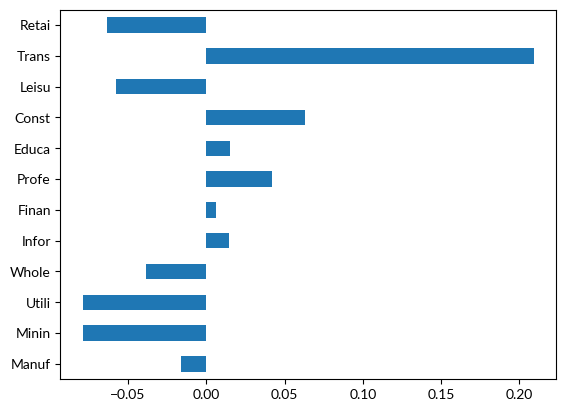

In [36]:
((data.iloc[-1] / data.iloc[0]) - 1).plot(kind='barh')

### CES data - Payrolls

In [24]:
series = {'CES0000000001': 'ALL',
          'CES3000000001': 'Manufacturing',
          'CES1000000001': 'Mining \& Logging',
          'CES4422000001': 'Utilities',
          'CES4142000001': 'Wholesale Trade',
          'CES5000000001': 'Information',
          'CES5500000001': 'Financial Activities',
          'CES6000000001': 'Professional \& Business Serv.',
          'CES6500000001': 'Education \& Health Services',
          'CES0500000001': 'Total Private',
          'CES2000000001': 'Construction',
          'CES7000000001': 'Leisure \& Hospitality',
          'CES4300000001': 'Transportation \& Warehousing',
          'CES4200000001': 'Retail Trade'}
df = bls_api(series, (2015, 2022), bls_key)
df.to_csv(data_dir / 'ces_data.csv', index_label='date')

Post Request Status: REQUEST_SUCCEEDED


In [25]:
pop = pd.read_csv(data_dir / 'jobs_report_main.csv', 
                  index_col='date', parse_dates=True).loc['2015':, 'POP']

df = pd.read_csv(data_dir / 'ces_data.csv', index_col='date', 
                 parse_dates=True)['ALL']

data = df.diff().loc['2019':] * 1_000
data.div(1_000_000).to_csv(data_dir / 'nfp.csv', index_label='date')

ltdt = dtxt(data.index[-1])['mon1']
prdt = dtxt(data.index[-2])['mon1']
if prdt[-4:] == ltdt[-4:]:
    prdt = prdt[:-5]
pr2dt = dtxt(data.index[-3])['mon1']
if pr2dt[-4:] == ltdt[-4:]:
    pr2dt = pr2dt[:-5]
lt = value_text(data.iloc[-1], 'increase_by', ptype=None, digits=0)
al = 'added' if data.iloc[-2] >= 0 else 'lost'
pr = f'{data.iloc[-2]:,.0f} jobs {al}'
pr2 = value_text(data.iloc[-3], 'added_lost_rev', ptype=None, 
                 digits=0)
cb = c_box('blue!60!purple')
val3m = data.iloc[-3:].mean()
valpr3m = data.iloc[-6:-3].mean()
ct = compare_text(val3m, valpr3m, [50000, 150000, 500000])
cov = data.loc['2020-03-01':'2020-04-01'].sum() / 1_000_000
pcadd = data.loc['2020-05-01':].sum() / 1_000_000
pcsh = (pcadd / abs(cov)) * 100
lpop = (pop.diff().rolling(12).mean().iloc[-1] * 
        (df / pop).rolling(12).mean().iloc[-1]) * 1_000
pr19v = data.loc['2019'].mean().round(-2)
pr3yr = value_text(data.iloc[-36:].mean().round(-2), 'added_lost', 
                   ptype=None, digits=0, adj='average')

text = (f'Nonfarm payrolls {lt} in {ltdt}, following {pr} in {prdt}, '+
        f'and {pr2} in {pr2dt} {cb}. Average payroll growth was '+
        f'{round(val3m,-2):,.0f} over these three months, '+
        f'{ct} the average of {round(valpr3m,-2):,.0f} '+
        'during the previous three months. \n\n During March and '+
        f'April 2020, the US lost a combined {abs(cov):.0f} million '+
        f'jobs. Since May 2020, a total of {pcadd:.1f} million jobs '+
        f'have been added, equivalent to {pcsh:.1f} percent of those lost.\n\n'+
        'To maintain a steady payroll employment rate with population growth, '+
        f'the US needed to add {round(lpop, -3):,.0f} '+
        f'jobs in {ltdt}. Pre-pandemic, in 2019, the US was adding an average '+
        f'of {pr19v:,.0f} jobs per month.')
write_txt(text_dir / 'nfp_basic_text.txt', text)
print(text)

# Node for latest value
tloc = dtxt(data.index[-1] - pd.DateOffset(weeks=20))['datetime']
tdt = dtxt(data.index[-1])['mon6']
pm = '+' if data.iloc[-1] >= 0 else '-'
tv = f'{pm}{abs(data.iloc[-1] / 1_000):.0f}k'
if abs(data.iloc[-1]) > 994_000:
    tv = f'{pm}{abs(data.iloc[-1] / 1_000_000):.1f} million'
text = ('\\node[below, align=right, pin=45:{}] at (axis cs: '+
        f'{{{tloc}}}, -1.2) {{\scriptsize {tdt}\\\\ \scriptsize {tv}}};')
write_txt(text_dir / 'nfp_lt_val.txt', text)

Nonfarm payrolls increased by 261,000 in October 2022, following 315,000 jobs added in September, and 292,000 added in August (see \cbox{blue!60!purple}). Average payroll growth was 289,300 over these three months, slightly below the average of 405,300 during the previous three months. 

 During March and April 2020, the US lost a combined 22 million jobs. Since May 2020, a total of 22.8 million jobs have been added, equivalent to 103.7 percent of those lost.

To maintain a steady payroll employment rate with population growth, the US needed to add 126,000 jobs in October 2022. Pre-pandemic, in 2019, the US was adding an average of 164,000 jobs per month.


### Government Jobs

In [26]:
pop = (pd.read_csv(data_dir / 'jobs_report_main.csv', parse_dates=['date'])
        .set_index('date'))['POP']
jobcats = ['govjobs', 'locjobs', 'stjobs', 'fedjobs']
df = (pd.read_csv(data_dir / 'jobs_report_main2.csv', index_col='date', 
                   parse_dates=['date'])[jobcats])
sh = df.divide(pop, axis=0) * 100
sh.loc['1989':].to_csv(data_dir / 'govjobs.csv', index_label='date')

grps = {'govjobs': 'blue!50!cyan', 'fedjobs': 'green!80!blue',
        'stjobs': 'orange', 'locjobs': 'red'}
for cat, col in grps.items():
    node = (end_node(sh[cat], col, date='m', percent=True) 
            if cat == 'govjobs' 
            else end_node(sh[cat], col, percent=True))
    write_txt(text_dir / f'{cat}_node.txt', node)
    
ltdate = dtxt(sh.index[-1])['mon1']
pryrdate = dtxt(sh.index[-13])['mon1']
ltval = df.govjobs.iloc[-1] / 1000 
pryrval = df.govjobs.iloc[-13] / 1000 
ltsh = sh.govjobs.iloc[-1]
pryrsh = sh.govjobs.iloc[-13]
ltfed = df.fedjobs.iloc[-1] / 1000 
ltst = df.stjobs.iloc[-1] / 1000 
ltloc = df.locjobs.iloc[-1] / 1000 
ltfedsh = sh.fedjobs.iloc[-1] 
ltstsh = sh.stjobs.iloc[-1]
ltlocsh = sh.locjobs.iloc[-1]
diff = df.govjobs.iloc[-1] - df.govjobs.loc['2019-12-01']#.mean()
gl = 'gained' if diff > 0 else 'lost'
difftxt = (f'{gl} {abs(diff):.0f},000' if abs(diff) < 1000 
           else f'{gl} {abs(diff) / 1000:.1f} million')
txt3 = f'Since 2019, the US has {difftxt} total government jobs. '
sh90 = sh.loc['1990':'1999', 'govjobs'].mean()
diff90 = ((sh90 / 100)
          * pop.iloc[-1]) - df.govjobs.iloc[-1]

txt1 = (f'In {ltdate}, there were {ltval:.1f} million government jobs, '+
        f'equivalent to {ltsh:.1f} for every 100 people in the age 16 and older population '+
        f'(see {{\color{{{grps["govjobs"]}}}\\textbf{{---}}}}). The previous year, '+
        f'in {pryrdate}, there were {pryrval:.1f} million government jobs, '+
        f'equivalent to {pryrsh:.1f} percent of the age 16 and older population. '+
        f'During the 1990s, there were {sh90:.1f} government jobs per person '+
        'age 16 or older. If the rate was the same today, there would be '+
        f'{diff90 / 1_000:.1f} million additional government workers.'+
        f'\n\nBy level of government, there were {ltloc:.1f} million '+
        f'local government workers in {ltdate}, equivalent to '+
        f'{ltlocsh:.1f} percent of those age 16 or older '+
        f'(see {{\color{{{grps["locjobs"]}}}\\textbf{{---}}}}). '+
        f'In the same period, there were {ltst:.1f} million state '+
        f'government workers ({ltstsh:.1f} percent of 16+ year olds, '+
        f'see {{\color{{{grps["stjobs"]}}}\\textbf{{---}}}}), and '+
        f'{ltfed:.1f} million federal government workers ({ltfedsh:.1f} '+
        f'percent, see {{\color{{{grps["fedjobs"]}}}\\textbf{{---}}}}).')

ch19 = df.iloc[-1] - df.loc['2019-12-01']#.mean()
locchsh = (ch19.locjobs / ch19.govjobs) * 100
stchtxt = value_text(ch19.stjobs, style='added_lost', ptype=None, digits=0)
fedchtxt = value_text(ch19.fedjobs, style='added_lost', ptype=None, digits=0)
locchtxt = value_text(ch19.locjobs, style='added_lost', ptype=None, digits=0)
aw = 'and' if ch19.fedjobs < 0 else 'while'
if (ch19.govjobs < 0) and (ch19.locjobs < 0):
    txt = (f'Of these, {abs(ch19.locjobs):,.0f},000, or {locchsh:.1f} '+
           'percent of the shortfall, are local government jobs. '+
           'During the same period, ')
else:
    txt = f'During the same period, local governments {locchtxt},000 jobs, '
    
txt2 = (f'state governments {stchtxt},000 jobs, {aw} '+
        f'the federal government {fedchtxt},000 jobs.')
text = txt1 + '\n\n' + txt3 + txt + txt2
write_txt(text_dir / 'govjobs.txt', text)
print(text)

In October 2022, there were 22.4 million government jobs, equivalent to 8.4 for every 100 people in the age 16 and older population (see {\color{blue!50!cyan}\textbf{---}}). The previous year, in October 2021, there were 22.1 million government jobs, equivalent to 8.4 percent of the age 16 and older population. During the 1990s, there were 9.7 government jobs per person age 16 or older. If the rate was the same today, there would be 3.4 million additional government workers.

By level of government, there were 14.2 million local government workers in October 2022, equivalent to 5.4 percent of those age 16 or older (see {\color{red}\textbf{---}}). In the same period, there were 5.3 million state government workers (2.0 percent of 16+ year olds, see {\color{orange}\textbf{---}}), and 2.9 million federal government workers (1.1 percent, see {\color{green!80!blue}\textbf{---}}).

Since 2019, the US has lost 381,000 total government jobs. Of these, 425,000, or 111.5 percent of the shortfall